**Proceso estándar de regresión**

1. Separar datos de entrenamiento / prueba
2. Normalizar datos / Crear un normalizador
3. Crear modelo (NN)
4. Entrenar
5. Evaluar resultados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
# Optimizador
from tensorflow.keras.optimizers import Adam

In [2]:
# Asegurar que los resultados sean 'reproducibles'
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [16]:
# Datos de entrenamiento / prueba
X_train = pd.read_csv('/content/X_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
X_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv')


In [17]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,4,90.0,75.0,2125.0,14.5,74,0,0,1
1,4,140.0,88.0,2890.0,17.3,79,0,0,1
2,8,350.0,160.0,4456.0,13.5,72,0,0,1
3,4,105.0,63.0,2125.0,14.7,82,0,0,1
4,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
309,6,200.0,85.0,2990.0,18.2,79,0,0,1
310,8,400.0,180.0,4220.0,11.1,77,0,0,1
311,4,108.0,93.0,2391.0,15.5,74,0,1,0
312,4,83.0,61.0,2003.0,19.0,74,0,1,0


In [18]:
X_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,390.0,190.0,3850.0,8.5,70,0,0,1
1,8,360.0,215.0,4615.0,14.0,70,0,0,1
2,8,304.0,193.0,4732.0,18.5,70,0,0,1
3,4,113.0,95.0,2228.0,14.0,71,0,1,0
4,6,232.0,100.0,2634.0,13.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...
73,4,112.0,88.0,2395.0,18.0,82,0,0,1
74,4,105.0,74.0,1980.0,15.3,82,1,0,0
75,4,108.0,70.0,2245.0,16.9,82,0,1,0
76,4,91.0,67.0,1965.0,15.7,82,0,1,0


In [19]:
y_train

,MPG
0,28.0
1,22.3
2,12.0
3,38.0
4,33.8
...,...
309,19.8
310,16.0
311,26.0
312,32.0


In [20]:
# Normalización
def crear_normalizador(datos):
  normalizer = Normalization(axis=-1)
  normalizer.adapt(np.array(datos))
  return normalizer


In [21]:
normalizador = crear_normalizador(X_train)

In [35]:
# Creación de Red Neuronal
def crear_redNeu_regresion(norm):
  model = Sequential([
      norm,
      Dense(32, activation='relu'),
      Dense(32, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1)
  ])
  model.compile(loss='mean_absolute_error', optimizer=Adam(0.001))
  return model

In [36]:
nn = crear_redNeu_regresion(normalizador)

In [37]:
# Entrenamiento del modelo
history = nn.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0,
    epochs=200
)

In [38]:
# Evaluar el rendimiento del modelo
nn.evaluate(X_test, y_test, verbose=0)

1.9209749698638916

In [39]:
# Creación de predicciones
y_pred = nn.predict(X_test).flatten()

3/3 [==============================] - 0s 9ms/step


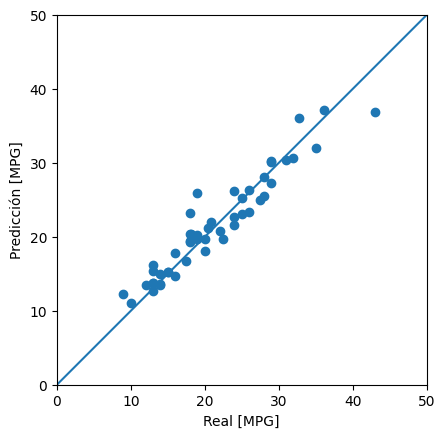

In [34]:
a = plt.axes(aspect='equal')
plt.scatter(y_test[0:50], y_pred[0:50])
plt.xlabel('Real [MPG]')
plt.ylabel('Predicción [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

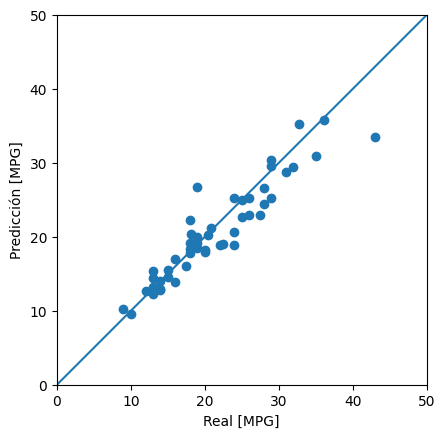

In [40]:
a = plt.axes(aspect='equal')
plt.scatter(y_test[0:50], y_pred[0:50])
plt.xlabel('Real [MPG]')
plt.ylabel('Predicción [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

NN1 (9X32X64X32X1): 1.77

NN2 (9x32x32x64x64x32x1): 1.92